In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
#Load the Dataset
df = pd.read_csv("area.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
df.shape

(5, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


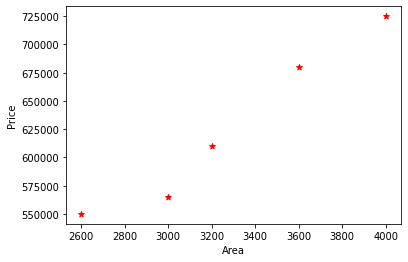

In [6]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='red',marker='*')

In [9]:
train=df.drop('price',axis='columns')
train

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [10]:
test = df.price
test

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [11]:
reg = linear_model.LinearRegression()
reg.fit(train,test)

LinearRegression()

In [14]:
#Predict House Price of 500 sqft
reg.predict([[3100]])


array([601558.21917808])

In [15]:
#Finding coeff : m
reg.coef_

array([135.78767123])

In [16]:
#Finding intercept : b
reg.intercept_   

180616.43835616432

In [18]:
reg.score(train,test)

0.0004178911712766631

### Y = m * X + b (m is coefficient and b is intercept)

In [17]:
135.78767123*3100+180616.43835616432

601558.2191691643

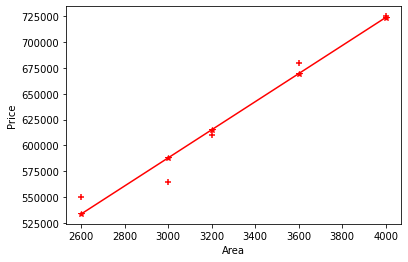

In [19]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(train,test,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='red',marker='*')


In [20]:
new_df = pd.read_csv('predictarea.csv')
new_df

,Area
0,500
1,750
2,1000
3,1500
4,2300
5,3540
6,4120
7,4560
8,5490
9,3460


In [21]:
pred = reg.predict(new_df)
pred

array([ 248510.2739726 ,  282457.19178082,  316404.10958904,
        384297.94520548,  492928.08219178,  661304.79452055,
        740061.64383562,  799808.21917808,  926090.75342466,
        650441.78082192,  825607.87671233,  492928.08219178,
       1402705.47945205, 1348390.4109589 , 1144708.90410959])

In [22]:
new_df['Price'] = pred
new_df

,Area,Price
0,500,2.485103e+05
1,750,2.824572e+05
2,1000,3.164041e+05
3,1500,3.842979e+05
4,2300,4.929281e+05
5,3540,6.613048e+05
6,4120,7.400616e+05
7,4560,7.998082e+05
8,5490,9.260908e+05
9,3460,6.504418e+05


In [23]:
new_df.to_csv('areaprediction.csv',index=False)

In [24]:
df.corr()

,area,price
area,1.000000,0.978994
price,0.978994,1.000000
